In [222]:
from selenium import webdriver
import re
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime

## Scrape Data from Website

In [2]:
# path to chrome driver
driver_path = "/Users/alexwalsh/Desktop/DU_Masters/chromedriver"
driver = webdriver.Chrome(executable_path=driver_path)

In [3]:
months = ["%.2d" % i for i in range(1,13,1)]
years = [str(i) for i in range(2000,2022,1)]
date_urls = []
for y in years:
    for m in months:
        date_urls.append("https://www.nuforc.org/webreports/ndxe{}.html".format(y+m))


In [4]:
df = pd.DataFrame(columns=['date/time', 'city', 'state', 'shape', 'duration', 'summary'])

for url in date_urls:
    print("Getting sighting for year/ month: " + re.findall('[0-9]+', url)[0])
    driver.get(url)
    table = driver.find_element_by_tag_name("tbody")
    rows = table.find_elements_by_tag_name("tr")
    results = []
    for sighting in rows:
        item = sighting.find_elements_by_tag_name("td")
        feats = {
            "date/time" : item[0].text,
            "city" : item[1].text,
            "state" : item[2].text,
            "shape" : item[3].text,
            "duration" : item[4].text,
            "summary" : item[5].text }
        results.append(feats)
        
    results_df = pd.DataFrame(results)
    
    df = pd.concat([df, results_df])

Getting sighting for year/ month: 200001
Getting sighting for year/ month: 200002
Getting sighting for year/ month: 200003
Getting sighting for year/ month: 200004
Getting sighting for year/ month: 200005
Getting sighting for year/ month: 200006
Getting sighting for year/ month: 200007
Getting sighting for year/ month: 200008
Getting sighting for year/ month: 200009
Getting sighting for year/ month: 200010
Getting sighting for year/ month: 200011
Getting sighting for year/ month: 200012
Getting sighting for year/ month: 200101
Getting sighting for year/ month: 200102
Getting sighting for year/ month: 200103
Getting sighting for year/ month: 200104
Getting sighting for year/ month: 200105
Getting sighting for year/ month: 200106
Getting sighting for year/ month: 200107
Getting sighting for year/ month: 200108
Getting sighting for year/ month: 200109
Getting sighting for year/ month: 200110
Getting sighting for year/ month: 200111
Getting sighting for year/ month: 200112
Getting sighting

In [20]:
df.reset_index(drop=True,inplace=True)

In [21]:
df.to_csv("ufo_dataframe")

## Cleaning / Feature Engineering

In [2]:
# Loading data from csv
df = pd.read_csv("ufo_dataframe.csv")
df.drop("Unnamed: 0",axis=1,inplace=True)

In [3]:
original = df.copy(deep = True)

## Cleaning Start

In [4]:
# split date / time into 2 columns

df['date'] = df['date/time'].apply(lambda x: x.split(" ")[0])
df['time'] = df['date/time'].apply(lambda x: x.split(" ")[1] if (len(x.split(" "))) > 1 else np.nan )
# some have a date, but no time, as far as i can tell all have a date
df

date/time                             city state     shape  \
0       1/31/00 22:21                        Escondido    CA    Circle   
1       1/31/00 21:00                   Cape Canaveral    FL     Light   
2       1/30/00 23:15  San Francisco (Farallon Island)    CA  Triangle   
3       1/30/00 10:30                   New Wilmington    PA    Circle   
4       1/29/00 13:00                        Beaverton    OR  Cylinder   
...               ...                              ...   ...       ...   
116516  12/1/21 08:00                     Mont Belvieu    TX  Changing   
116517  12/1/21 08:00                           Austin    TX  Changing   
116518  12/1/21 06:00                       Wytheville    VA     Light   
116519  12/1/21 05:30                 North Fort Myers    FL      Disk   
116520  12/1/21 03:30                          Spokane    WA     Light   

             duration                                            summary  \
0              8 mins  approx 22:21 saw a bright light hovering just ...   
1            1 minute  Glowing green light came up right side of movi...   
2                 :15  Encountered large triangular object while nigh...   
3           2 minutes  An airplane like object was witneesed in the s...   
4               15min  Traveling from Portland to Beaverton Saturday ...   
...               ...                                                ...   
116516            NaN  A star-like object seen flitting around at 8am...   
116517        5 years  ((HOAX)) UFO on a star with men in red armored...   
116518  30-60 seconds  Pulsating light doing 90 turns and zig zags be...   
116519            NaN  First witness spotted three black disks, calle...   
116520            NaN  I work ATC at GEG international airport. I kno...   

           date   time  
0       1/31/00  22:21  
1       1/31/00  21:00  
2       1/30/00  23:15  
3       1/30/00  10:30  
4       1/29/00  13:00  
...         ...    ...  
116516  12/1/21  08:00  
116517  12/1/21  08:00  
116518  12/1/21  06:00  
116519  12/1/21  05:30  
116520  12/1/21  03:30  

[116521 rows x 8 columns]

In [5]:
sum(df['date/time'].isna())
# looks like theres a date/time for all 

0

In [6]:
# replacing blanks with np.nan to make things easier for us
df.replace(to_replace="",value=np.nan,inplace=True)

In [7]:
# change d-typings
df = df.astype({
    "city" : "str",
    "state" : "str",
    "shape" : "str",
    "duration" : "str",
    "summary"  : "str"
})

In [8]:
# convert shape, duration, summary all to lower case
df['shape'] = df['shape'].apply(lambda x : x.lower())
df['duration'] = df['duration'].apply(lambda x : x.lower().replace("\n","").strip()) # remove new lines, white space
df['summary'] = df['summary'].apply(lambda x : x.lower())

# convert State to upper 
df['state'] = df['state'].apply(lambda x : x.upper())

# Capitalize city -- if necessary

In [9]:
df

date/time                             city state     shape  \
0       1/31/00 22:21                        Escondido    CA    circle   
1       1/31/00 21:00                   Cape Canaveral    FL     light   
2       1/30/00 23:15  San Francisco (Farallon Island)    CA  triangle   
3       1/30/00 10:30                   New Wilmington    PA    circle   
4       1/29/00 13:00                        Beaverton    OR  cylinder   
...               ...                              ...   ...       ...   
116516  12/1/21 08:00                     Mont Belvieu    TX  changing   
116517  12/1/21 08:00                           Austin    TX  changing   
116518  12/1/21 06:00                       Wytheville    VA     light   
116519  12/1/21 05:30                 North Fort Myers    FL      disk   
116520  12/1/21 03:30                          Spokane    WA     light   

             duration                                            summary  \
0              8 mins  approx 22:21 saw a bright light hovering just ...   
1            1 minute  glowing green light came up right side of movi...   
2                 :15  encountered large triangular object while nigh...   
3           2 minutes  an airplane like object was witneesed in the s...   
4               15min  traveling from portland to beaverton saturday ...   
...               ...                                                ...   
116516            nan  a star-like object seen flitting around at 8am...   
116517        5 years  ((hoax)) ufo on a star with men in red armored...   
116518  30-60 seconds  pulsating light doing 90 turns and zig zags be...   
116519            nan  first witness spotted three black disks, calle...   
116520            nan  i work atc at geg international airport. i kno...   

           date   time  
0       1/31/00  22:21  
1       1/31/00  21:00  
2       1/30/00  23:15  
3       1/30/00  10:30  
4       1/29/00  13:00  
...         ...    ...  
116516  12/1/21  08:00  
116517  12/1/21  08:00  
116518  12/1/21  06:00  
116519  12/1/21  05:30  
116520  12/1/21  03:30  

[116521 rows x 8 columns]

In [10]:
# cleaning duration column
    # put in standardized format -- %H/%M/%S --> 01:12:33 = 1 hour, 12 minutes, 33 seconds, 
    #can use strtime to convert back and forth if we need time object
    #best will prob be a regexp to split into parsing categories
    
    # if there are other char than numeric (i.e. :15 or 15 seconds)
        # then 
            # grab numeric chars in first part of string
                # contains("min") -> minute / contains("sec") -> seconds / contians("hour") -> hours
                # put values into dictionary and then into string format 
            # if contains - : take the mean of two values opposing - , i.e '2-4' --> 3
        # else if in m:s format
            # parse into corresponding dict
        # else
        
        

In [11]:
df[df['duration'].apply(lambda x : True if re.search("min",x) else False)].duration.head(20)

0                        8 mins
1                      1 minute
3                     2 minutes
4                         15min
5                     5 minutes
6                      1-2 min.
11                     5-6 min.
13                     2-3mins.
14                   20 minutes
17                15-20 minutes
18                   10 minutes
20                      30 min.
21                        3 min
23                   05 minutes
25                    4 minutes
26                   10 minutes
27                      6 minit
30    23:15 again for 15 minute
31                        3 min
32                     1 minute
Name: duration, dtype: object

In [12]:
def get_immediate_left_numeric(str_val): # helper function to get numeric char immediatley left of keyword, exclude spaces
#     print(str_val)
    str_val = str_val.strip()
    str_val = re.findall(r'\d+', str_val)[0]
    if re.search(" ",str_val) is not None: # if contains multiple spaces, split
        min_string = str_val.split(" ")
        for i in range(len(min_string)):
            if re.search("[0-9]",min_string[-1][0]) is None:
                min_string = min_string[:-1] # drop leftmost value if not numeric
            else:
                return re.findall(r'\d+', min_string[-1])[0]
    else:
        return re.findall(r'\d+', str_val)[0]

In [103]:
t = "2230"

re.findall(r'\d+',t)[0]

'2230'

In [127]:
def get_interval_data(interval, x): 
    ret = "0"
    if len(re.findall(r'\d+',x)[0]) == 4 and re.search(interval,x) is None: # Some records have military time as duration, i.e 2325 -- drop these 
            return np.nan
    # function to search for interval term and grab / clean numeric values associated with interval
    if interval == "min" and re.search("[a-z]",x) is None: # if it just has numeric charecters, assume minutes
        return re.findall(r'\d+',x)[0] # get just numeric charecter and return
    
    if re.search(interval,x) : # contains interval term / or if it's just numeric chars, we want to assume minutes
#         print("Term: ", x)
        # grab word / number left of interval
#         ret = x.split(interval)[0].strip() 
#         ret = ret.strip()

        ret = x.split(interval)[0].strip().split()[-1]
        
        
#         print("first: ",ret)
        if re.search("[0-9]",ret) is None: # if doesn't have numeric char
#             print("numeric")
            ret = ret.strip()
#             print(ret)
            if interval == "min": # only run these on minutes
                if (ret == "half") or (re.search("moment",ret) != None):
                    ret = ".5"
                elif re.search("one",ret) != None:
                    ret = "1"
                elif (re.search("two",ret) != None) or (re.search("few",ret)!= None) or (re.search("couple",ret)!=None) or (re.search("several",ret)!=None):
                    ret = "2"
                elif ret == "two":
                    ret = "2"
                elif re.search("three",ret) != None:
                    ret = "3"
                elif re.search("four",ret) != None:
                    ret = "4"
                elif re.search("five",ret) != None:
                    ret = "5"
                elif re.search("six",ret) != None:
                    ret = "6"
                elif re.search("seven",ret) != None:
                    ret = "7"
                elif re.search("eight",ret) != None:
                    ret = "8"
                elif re.search("nine",ret) != None:
                    ret = "6"
                elif  re.search("ten",ret) != None:
                    ret = "10"
                elif  re.search("fifteen",ret) != None:
                    ret = "10"
                elif re.search("twenty",ret) != None:
                    ret = "20"
                elif re.search("thirty",ret) != None:
                    ret = "30"
                elif re.search("forty",ret) != None:
                    ret = "40"
                
                
                
                else:
                    print("Missed condtion:", ret)
                    return ret
#             print("returning: ",ret)
            return ret        
    
        else: # has just numeric chars
#             print("type: ",type(ret))
            ret = get_immediate_left_numeric(ret) # get cleaned numeric char
#             print("left_num: ",ret)
            if ret == "1/2":
                ret = ".5"
#                 print("numeric :",ret)
#                 elif re.search("-",ret):
#                     lw = ret.split("-")[0]
#                     try:
#                         upr = ret.split("-")[1]
#                     except: # if for some reason '-' is not inbetween 2 numeric chars, we'd get an index access error
#                         upr = ret.split("-")[0]
#                     ret = str((int(upr) + int(lw)) / 2)
        return ret
        
    else: # doesn't contain interval term
        return ret

In [128]:
def clean_duration(x):
    try:
        if re.search("[a-zA-z]",x) is None: # if contains just non-numeric char
            mins = get_interval_data("min",x) # assume all plain speech is talking iin minutes, i.e a few
            hours = "0"
            sec = "0"
        else:
            sec = get_interval_data("sec",x)
            mins = get_interval_data("min",x)
            hours = get_interval_data("hour",x)  
            
            
        
#         print(hours,mins,sec)
        
        time = hours+":"+mins+":"+sec

        return time

    except Exception as e:
#         print("Excpetion error:",x)
#         print("\n",e)
        return np.nan

In [129]:
df['cleaned_duration'] = df.duration.apply(lambda x :  clean_duration(x)) # clean values

Missed condtion: +
Missed condtion: plus
Missed condtion: many
Missed condtion: +
Missed condtion: plus
Missed condtion: to
Missed condtion: (
Missed condtion: +
Missed condtion: +
Missed condtion: a
Missed condtion: +
Missed condtion: +
Missed condtion: ,
Missed condtion: more
Missed condtion: +
Missed condtion: plus
Missed condtion: plus
Missed condtion: plus
Missed condtion: +
Missed condtion: +
Missed condtion: ,
Missed condtion: a
Missed condtion: a
Missed condtion: +-
Missed condtion: a
Missed condtion: a
Missed condtion: a
Missed condtion: +
Missed condtion: plus
Missed condtion: plus
Missed condtion: +
Missed condtion: plus
Missed condtion: plus
Missed condtion: solid
Missed condtion: plus
Missed condtion: a
Missed condtion: -
Missed condtion: less
Missed condtion: a
Missed condtion: +
Missed condtion: plus
Missed condtion: more
Missed condtion: a
Missed condtion: a
Missed condtion: follow
Missed condtion: +
Missed condtion: +
Missed condtion: +
Missed condtion: a
Missed condti

In [130]:
df

date/time                             city state     shape  \
0       1/31/00 22:21                        Escondido    CA    circle   
1       1/31/00 21:00                   Cape Canaveral    FL     light   
2       1/30/00 23:15  San Francisco (Farallon Island)    CA  triangle   
3       1/30/00 10:30                   New Wilmington    PA    circle   
4       1/29/00 13:00                        Beaverton    OR  cylinder   
...               ...                              ...   ...       ...   
116516  12/1/21 08:00                     Mont Belvieu    TX  changing   
116517  12/1/21 08:00                           Austin    TX  changing   
116518  12/1/21 06:00                       Wytheville    VA     light   
116519  12/1/21 05:30                 North Fort Myers    FL      disk   
116520  12/1/21 03:30                          Spokane    WA     light   

             duration                                            summary  \
0              8 mins  approx 22:21 saw a bright light hovering just ...   
1            1 minute  glowing green light came up right side of movi...   
2                 :15  encountered large triangular object while nigh...   
3           2 minutes  an airplane like object was witneesed in the s...   
4               15min  traveling from portland to beaverton saturday ...   
...               ...                                                ...   
116516            nan  a star-like object seen flitting around at 8am...   
116517        5 years  ((hoax)) ufo on a star with men in red armored...   
116518  30-60 seconds  pulsating light doing 90 turns and zig zags be...   
116519            nan  first witness spotted three black disks, calle...   
116520            nan  i work atc at geg international airport. i kno...   

           date   time cleaned_duration hours minutes seconds  total_time  
0       1/31/00  22:21            0:8:0     0       8       0         8.0  
1       1/31/00  21:00            0:1:0     0       1       0         1.0  
2       1/30/00  23:15           0:15:0     0      15       0        15.0  
3       1/30/00  10:30            0:2:0     0       2       0         2.0  
4       1/29/00  13:00           0:15:0     0      15       0        15.0  
...         ...    ...              ...   ...     ...     ...         ...  
116516  12/1/21  08:00              NaN     0       0       0         0.0  
116517  12/1/21  08:00            0:0:0     0       0       0         0.0  
116518  12/1/21  06:00           0:0:30     0       0      30         0.5  
116519  12/1/21  05:30              NaN     0       0       0         0.0  
116520  12/1/21  03:30              NaN     0       0       0         0.0  

[116521 rows x 13 columns]

In [131]:
df.cleaned_duration.fillna('0:0:0',inplace = True) # fill na with 0 for coverting to float ease, excluding 0 vals when graphing

In [132]:
df["hours"] = df['cleaned_duration'].apply(lambda x : x.split(':')[0] if  x != np.nan else np.nan)
df["minutes"] = df['cleaned_duration'].apply(lambda x : x.split(':')[1] if x != np.nan else np.nan)
df["seconds"] = df['cleaned_duration'].apply(lambda x : x.split(':')[2] if x != np.nan else np.nan)

In [133]:
def create_total_time(x): # put all time in minutes for graphing 
    try:
        hours = float(x.hours) * 60
        minutes = float(x.minutes)
        seconds = float(x.seconds) / 60
        time = hours+minutes+seconds
        return time
    except:
        return 0

In [134]:
df['total_time'] = df.apply(create_total_time,axis=1)

In [206]:
df['year'] = df.date.apply(lambda x : x.split('/')[-1])
df['month'] = df.date.apply(lambda x : x.split('/')[0])
df['day'] = df.date.apply(lambda x : x.split('/')[1])

In [159]:
df

date/time                             city state     shape  \
0       1/31/00 22:21                        Escondido    CA    circle   
1       1/31/00 21:00                   Cape Canaveral    FL     light   
2       1/30/00 23:15  San Francisco (Farallon Island)    CA  triangle   
3       1/30/00 10:30                   New Wilmington    PA    circle   
4       1/29/00 13:00                        Beaverton    OR  cylinder   
...               ...                              ...   ...       ...   
116516  12/1/21 08:00                     Mont Belvieu    TX  changing   
116517  12/1/21 08:00                           Austin    TX  changing   
116518  12/1/21 06:00                       Wytheville    VA     light   
116519  12/1/21 05:30                 North Fort Myers    FL      disk   
116520  12/1/21 03:30                          Spokane    WA     light   

             duration                                            summary  \
0              8 mins  approx 22:21 saw a bright light hovering just ...   
1            1 minute  glowing green light came up right side of movi...   
2                 :15  encountered large triangular object while nigh...   
3           2 minutes  an airplane like object was witneesed in the s...   
4               15min  traveling from portland to beaverton saturday ...   
...               ...                                                ...   
116516            nan  a star-like object seen flitting around at 8am...   
116517        5 years  ((hoax)) ufo on a star with men in red armored...   
116518  30-60 seconds  pulsating light doing 90 turns and zig zags be...   
116519            nan  first witness spotted three black disks, calle...   
116520            nan  i work atc at geg international airport. i kno...   

           date   time cleaned_duration hours minutes seconds  total_time  \
0       1/31/00  22:21            0:8:0     0       8       0         8.0   
1       1/31/00  21:00            0:1:0     0       1       0         1.0   
2       1/30/00  23:15           0:15:0     0      15       0        15.0   
3       1/30/00  10:30            0:2:0     0       2       0         2.0   
4       1/29/00  13:00           0:15:0     0      15       0        15.0   
...         ...    ...              ...   ...     ...     ...         ...   
116516  12/1/21  08:00            0:0:0     0       0       0         0.0   
116517  12/1/21  08:00            0:0:0     0       0       0         0.0   
116518  12/1/21  06:00           0:0:30     0       0      30         0.5   
116519  12/1/21  05:30            0:0:0     0       0       0         0.0   
116520  12/1/21  03:30            0:0:0     0       0       0         0.0   

       year month day  
0        00    31   1  
1        00    31   1  
2        00    30   1  
3        00    30   1  
4        00    29   1  
...     ...   ...  ..  
116516   21     1  12  
116517   21     1  12  
116518   21     1  12  
116519   21     1  12  
116520   21     1  12  

[116521 rows x 16 columns]

In [136]:
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [160]:
tt = df[df.total_time != 0].groupby("date").mean()
tt.reset_index(inplace=True)
tt['year'] = tt['date'].apply(lambda x : x.split('/')[2])

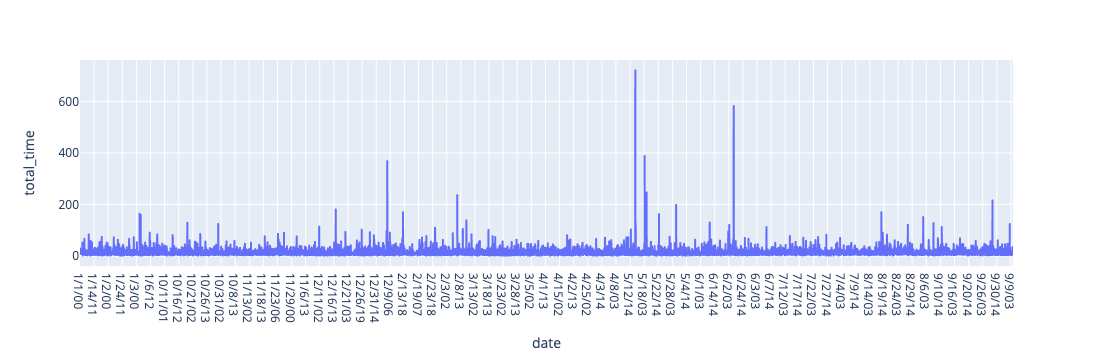

In [141]:
px.line(data_frame = tt, x="date",y="total_time" )


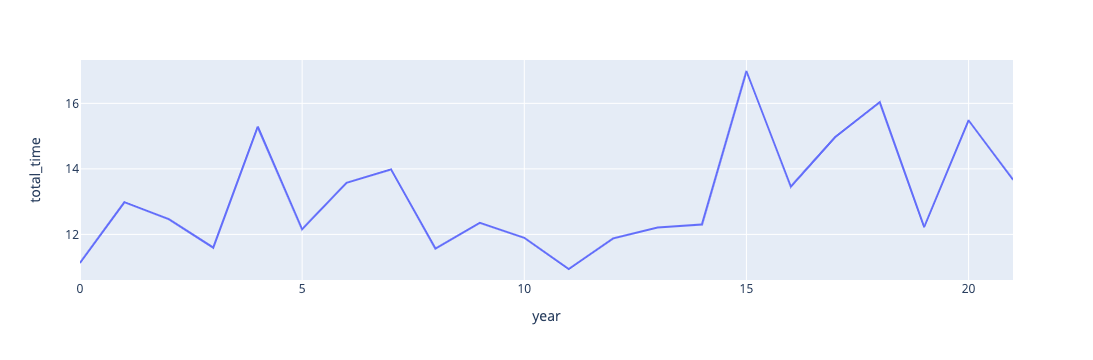

In [142]:
px.line(data_frame = tt.groupby("year",as_index=False).mean(), x="year",y="total_time" )


In [146]:
df[df.total_time != 0]

date/time                             city state      shape  \
0       1/31/00 22:21                        Escondido    CA     circle   
1       1/31/00 21:00                   Cape Canaveral    FL      light   
2       1/30/00 23:15  San Francisco (Farallon Island)    CA   triangle   
3       1/30/00 10:30                   New Wilmington    PA     circle   
4       1/29/00 13:00                        Beaverton    OR   cylinder   
...               ...                              ...   ...        ...   
116447  12/3/21 19:00                      Waynesville    NC      other   
116469  12/3/21 18:30                      Wheat Ridge    CO      light   
116481  12/3/21 17:30                           Irvine    CA  formation   
116504  12/2/21 18:30                        Elk Grove    CA      other   
116518  12/1/21 06:00                       Wytheville    VA      light   

             duration                                            summary  \
0              8 mins  approx 22:21 saw a bright light hovering just ...   
1            1 minute  glowing green light came up right side of movi...   
2                 :15  encountered large triangular object while nigh...   
3           2 minutes  an airplane like object was witneesed in the s...   
4               15min  traveling from portland to beaverton saturday ...   
...               ...                                                ...   
116447      3 minutes  straight line of hundreds of lights. never cha...   
116469     15 seconds  loud jet noise, round red lights flashed north...   
116481      5 minutes  me and siblings were at park when i spotted st...   
116504       1 minute            parallel lights in east nearly overhead   
116518  30-60 seconds  pulsating light doing 90 turns and zig zags be...   

           date   time cleaned_duration hours minutes seconds  total_time  
0       1/31/00  22:21            0:8:0     0       8       0        8.00  
1       1/31/00  21:00            0:1:0     0       1       0        1.00  
2       1/30/00  23:15           0:15:0     0      15       0       15.00  
3       1/30/00  10:30            0:2:0     0       2       0        2.00  
4       1/29/00  13:00           0:15:0     0      15       0       15.00  
...         ...    ...              ...   ...     ...     ...         ...  
116447  12/3/21  19:00            0:3:0     0       3       0        3.00  
116469  12/3/21  18:30           0:0:15     0       0      15        0.25  
116481  12/3/21  17:30            0:5:0     0       5       0        5.00  
116504  12/2/21  18:30            0:1:0     0       1       0        1.00  
116518  12/1/21  06:00           0:0:30     0       0      30        0.50  

[101483 rows x 13 columns]

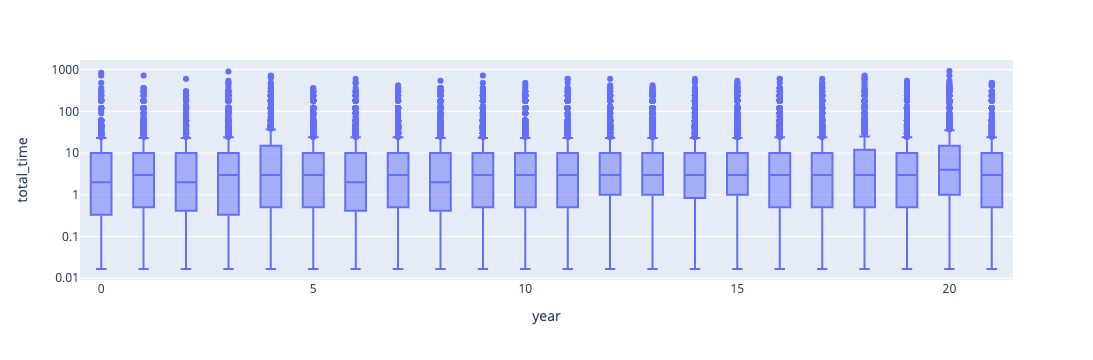

In [157]:
px.box(data_frame=df[(df.total_time != 0) & (df.total_time < 1000)], y = "total_time",x='year',log_y=True)
# applying log scale to make it readable, but generally no outliers when comparing years


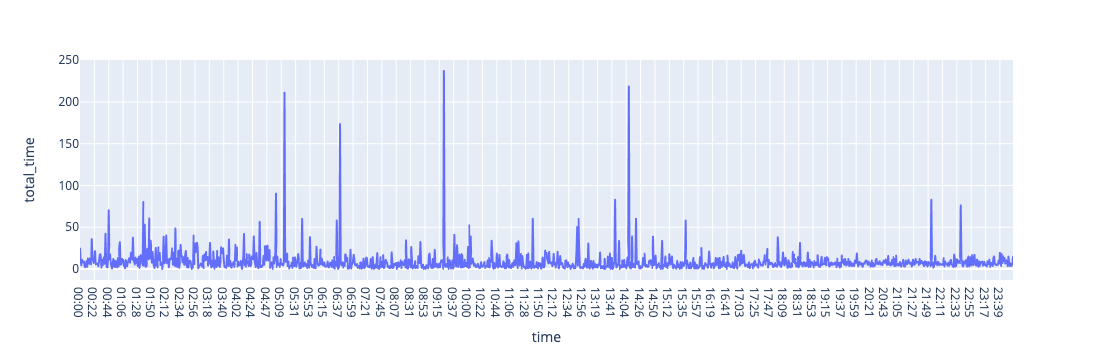

In [163]:
tod = df[df.total_time != 0].groupby("time").mean()
tod.reset_index(inplace=True)
px.line(data_frame = tod, x="time",y="total_time" )


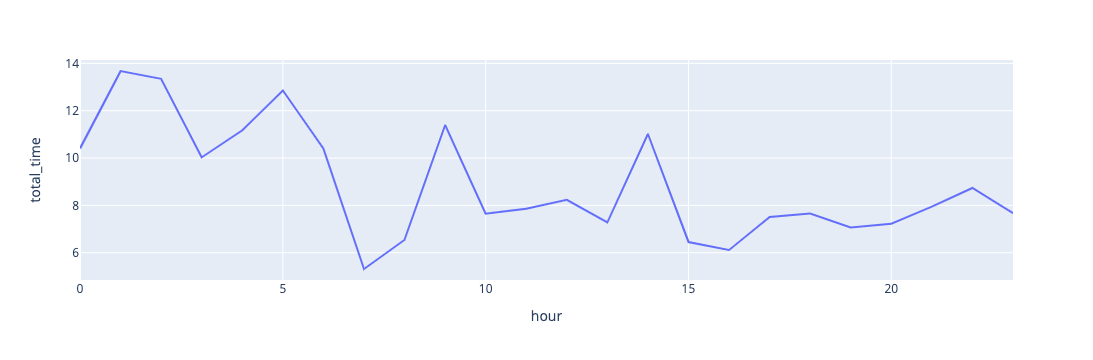

In [179]:
tod['hour'] = tod.time.apply(lambda t:t.split(':')[0])
hod = tod.groupby("hour").mean()
hod.reset_index(inplace=True)
px.line(data_frame=hod,x='hour',y='total_time')

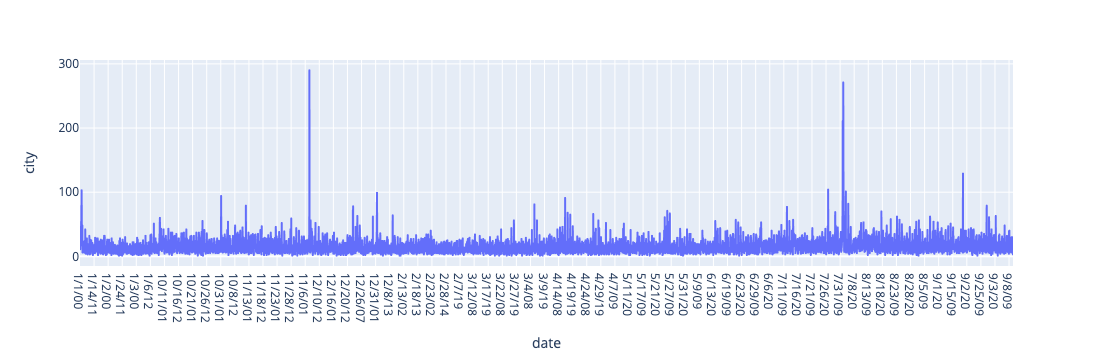

In [240]:
px.line(data_frame=df.groupby(by="date",as_index=False).count()[['date',"city"]], x='date',y='city')
# too noisey, grouping by month

In [223]:
md = df.groupby(by=["year","month"], as_index=False).count()[["year","month","city"]]
md["month_year"] = md["month"] + "-" + md["year"]
md["month_year"] = md.month_year.apply(lambda x : datetime.strptime(x,"%m-%y"))

In [227]:
md.sort_values(by=['month_year'],ascending=False,inplace=True)

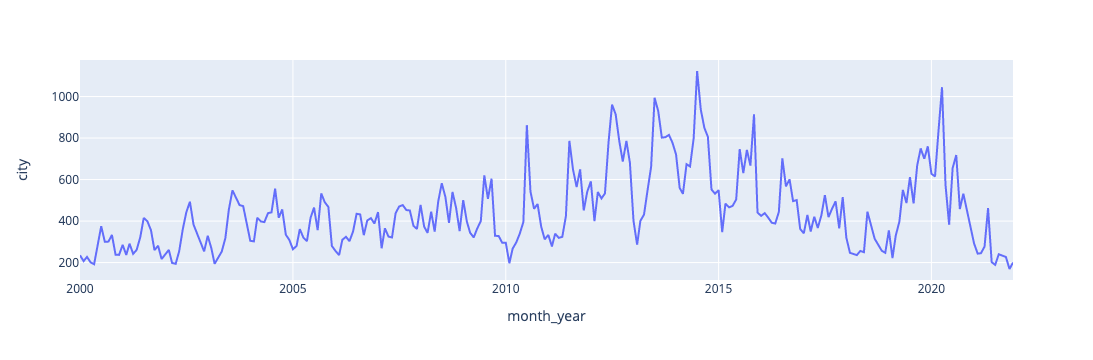

In [228]:
px.line(data_frame= md , x="month_year" , y="city")

In [238]:
df.groupby("state",as_index=False).count()[["state","city"]].sort_values(by="city",ascending=False).head(15) 
# Top 15 highest sighted states

state   city
8     CA  12793
38   NAN   7541
15    FL   6726
82    WA   5514
74    TX   4676
50    NY   4523
5     AZ   4031
59    PA   4000
20    IL   3462
53    OH   3458
40    NC   2978
58    OR   2837
33    MI   2794
10    CO   2616
45    NJ   2315

In [239]:
df.groupby(["state","year"],as_index=False).count()[["state","year","city"]].sort_values(by="city",ascending=False).head(15) 
# Top 15 highest sighted states with year, CA been seeing some freaky stuff

state year  city
148    CA   14   869
149    CA   15   814
146    CA   12   760
147    CA   13   728
142    CA   08   708
143    CA   09   646
260    FL   14   644
145    CA   11   625
154    CA   20   623
144    CA   10   605
137    CA   03   598
151    CA   17   592
141    CA   07   588
150    CA   16   579
138    CA   04   565